In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [40]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/test.csv')

D_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_D_코드.csv', index_col = 0).T.to_dict()
H_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_H_코드.csv', index_col = 0).T.to_dict()
L_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_L_코드.csv', index_col = 0).T.to_dict()

In [41]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [42]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [43]:
# 관련 코드들을 한번에 모델 돌리기 위해서
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(train, D_code, H_code, L_code)
test_data = add_code(test, D_code, H_code, L_code)

print(train_data.shape)
print(test_data.shape)

(501951, 54)
(46404, 53)


## 속성 코드 이해하기 D, H, L

In [44]:
D_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_D_코드.csv')
H_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_H_코드.csv')
L_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_L_코드.csv')

In [45]:
print('##################### D 코드 ################################')
print('D 대분류코드 개수 :',len(D_code['속성 D 대분류코드'].unique()))
print('D 중분류코드 개수 :',len(D_code['속성 D 중분류코드'].unique()))
print('D 소분류코드 개수 :',len(D_code['속성 D 소분류코드'].unique()))
print('D 세분류코드 개수 :',len(D_code['속성 D 세분류코드'].unique()))

print('##################### H 코드 ################################')
print('H 대분류코드 개수 :',len(H_code['속성 H 대분류코드'].unique()))
print('H 중분류코드 개수 :',len(H_code['속성 H 중분류코드'].unique()))

print('##################### L 코드 ################################')
print('L 대분류코드 개수 :',len(L_code['속성 L 대분류코드'].unique()))
print('L 중분류코드 개수 :',len(L_code['속성 L 중분류코드'].unique()))
print('L 소분류코드 개수 :',len(L_code['속성 L 소분류코드'].unique()))
print('L 세분류코드 개수 :',len(L_code['속성 L 세분류코드'].unique()))

##################### D 코드 ################################
D 대분류코드 개수 : 11
D 중분류코드 개수 : 36
D 소분류코드 개수 : 137
D 세분류코드 개수 : 451
##################### H 코드 ################################
H 대분류코드 개수 : 21
H 중분류코드 개수 : 256
##################### L 코드 ################################
L 대분류코드 개수 : 22
L 중분류코드 개수 : 99
L 소분류코드 개수 : 332
L 세분류코드 개수 : 828


### D 코드

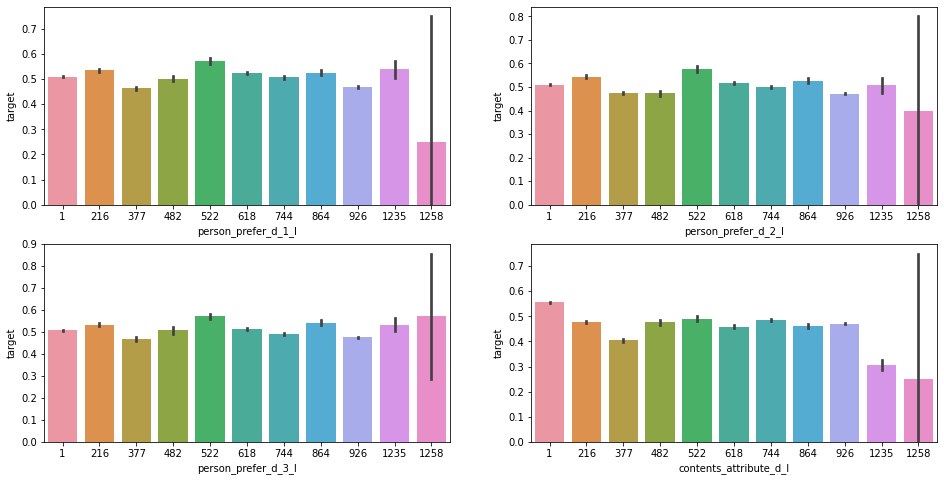

In [46]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,8))

sns.barplot(data = train, x = 'person_prefer_d_1_l', y = 'target', ax = ax[0,0])
sns.barplot(data = train, x = 'person_prefer_d_2_l', y = 'target',ax = ax[0,1])
sns.barplot(data = train, x = 'person_prefer_d_3_l',y = 'target', ax = ax[1,0])
sns.barplot(data = train, x = 'contents_attribute_d_l', y = 'target',ax = ax[1,1])

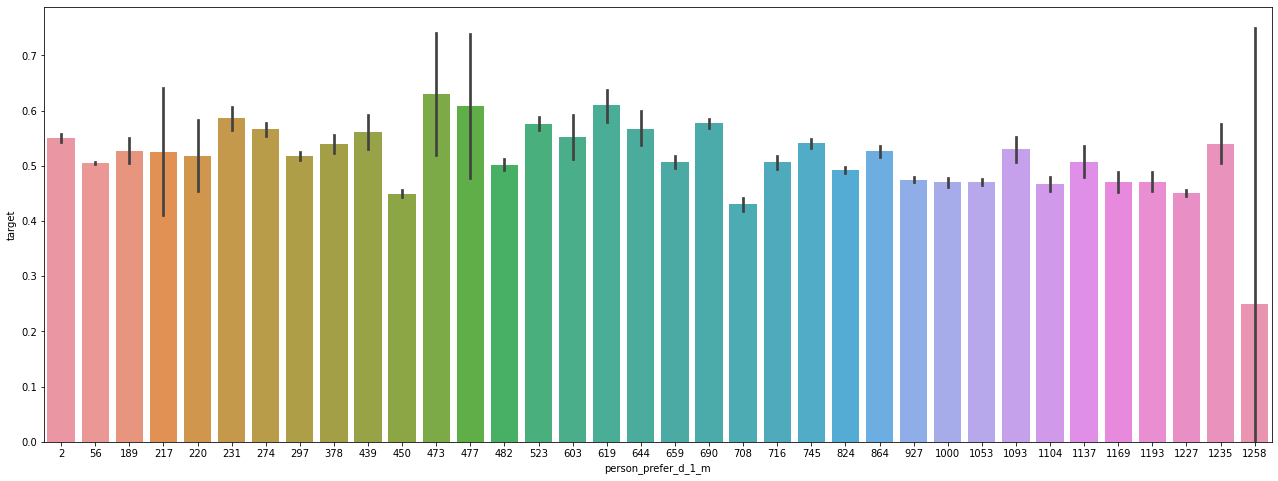

In [47]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_d_1_m', y = 'target')

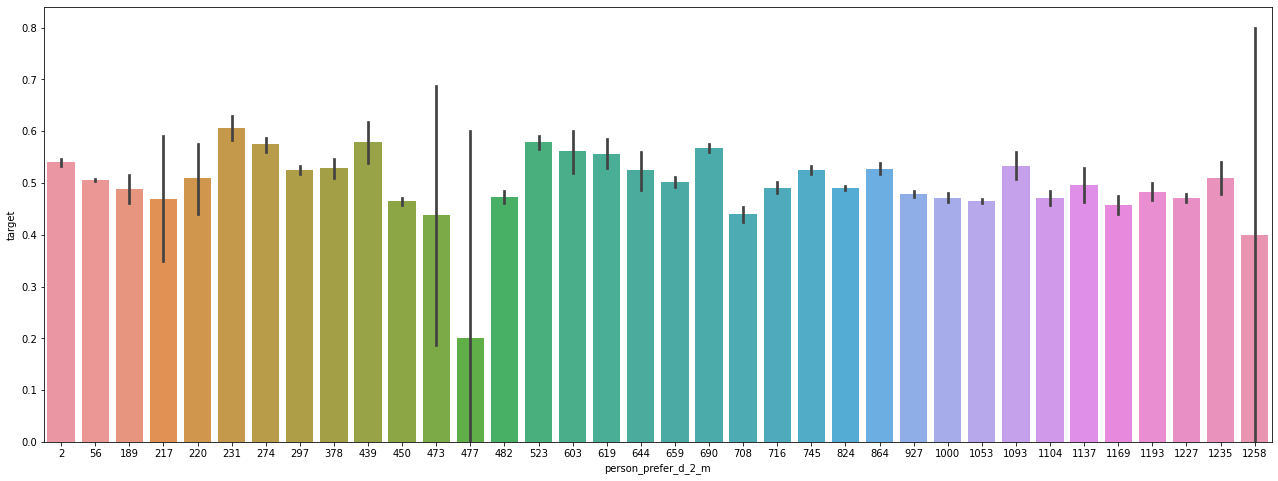

In [48]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_d_2_m', y = 'target')

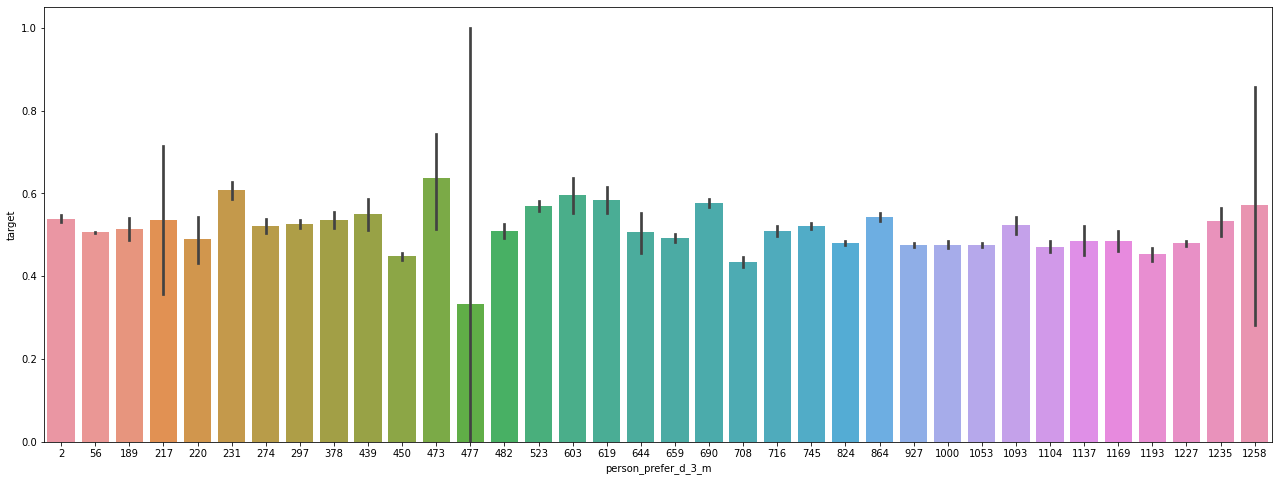

In [49]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_d_3_m', y = 'target')

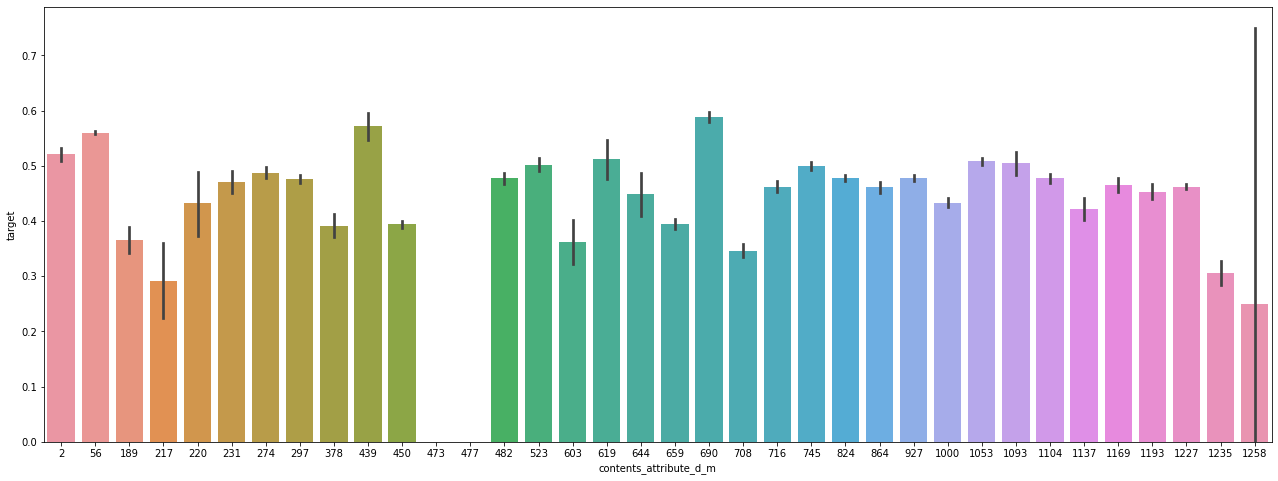

In [50]:
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'contents_attribute_d_m', y = 'target')

In [51]:
for i in ['person_prefer_d_1_l','person_prefer_d_2_l','person_prefer_d_3_l','contents_attribute_d_l']:
    
    print(f'##################### {i} #############################')
    for j in train[i].unique():
        
        print(f'##################### {j} #############################')
        print(train[train[i] == j][i[:-1] + 'm'].value_counts())

##################### person_prefer_d_1_l #############################
##################### 216 #############################
297    16673
274     6990
231     2254
220      249
217       78
Name: person_prefer_d_1_m, dtype: int64
##################### 1 #############################
56     190011
2       15914
189      1521
Name: person_prefer_d_1_m, dtype: int64
##################### 377 #############################
450    22240
378     2998
439      994
473       73
477       46
Name: person_prefer_d_1_m, dtype: int64
##################### 618 #############################
690    12148
659     8769
716     6012
708     5335
619     1138
644     1007
Name: person_prefer_d_1_m, dtype: int64
##################### 926 #############################
927     37305
1053    31260
1227    30041
1000    13481
1104     6115
1193     3696
1169     2708
1093     1881
1137     1188
Name: person_prefer_d_1_m, dtype: int64
##################### 744 #############################
824    35474
745  

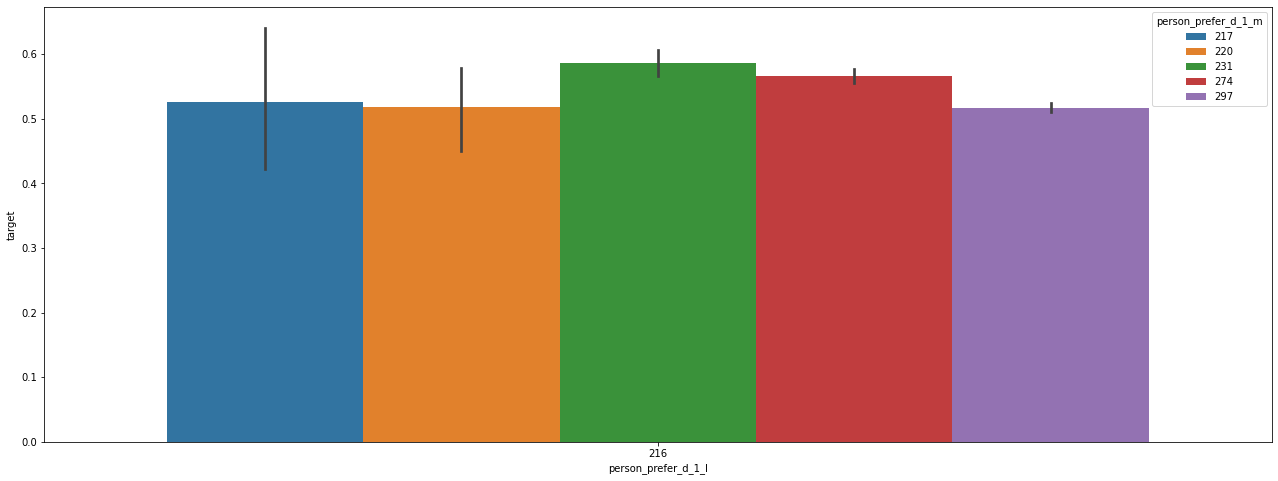

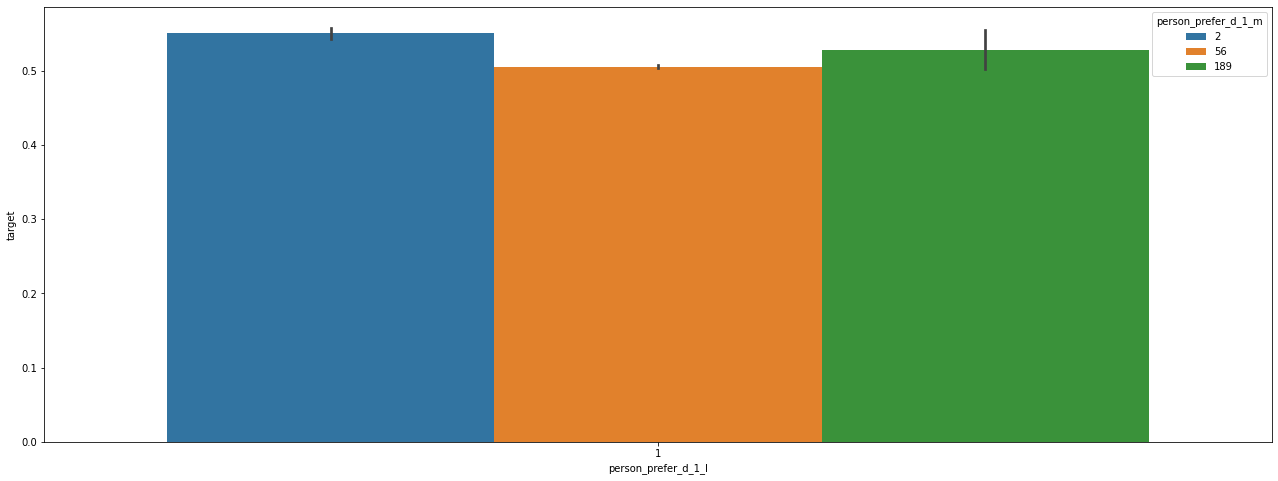

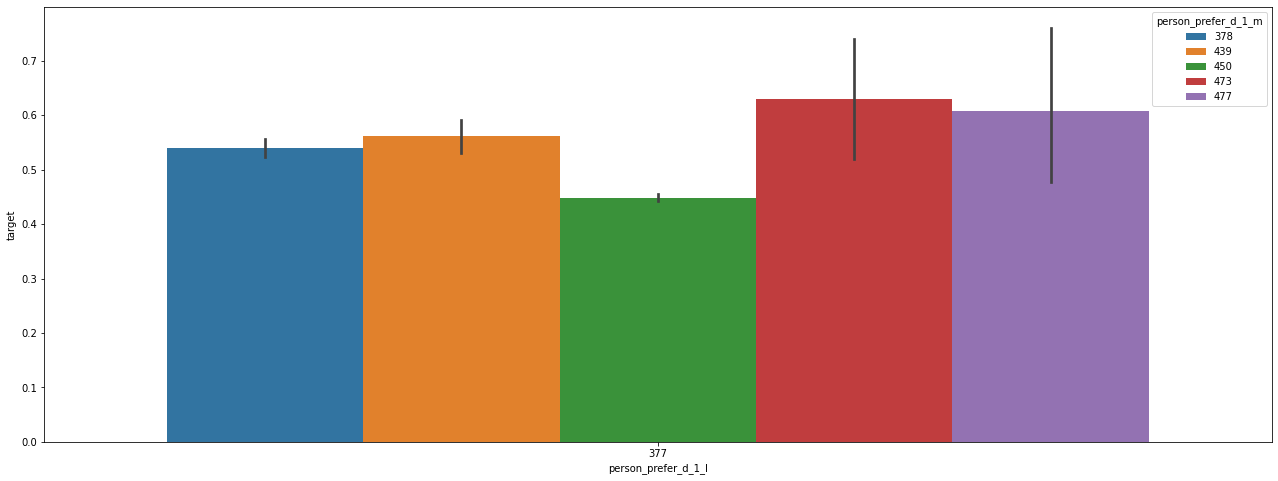

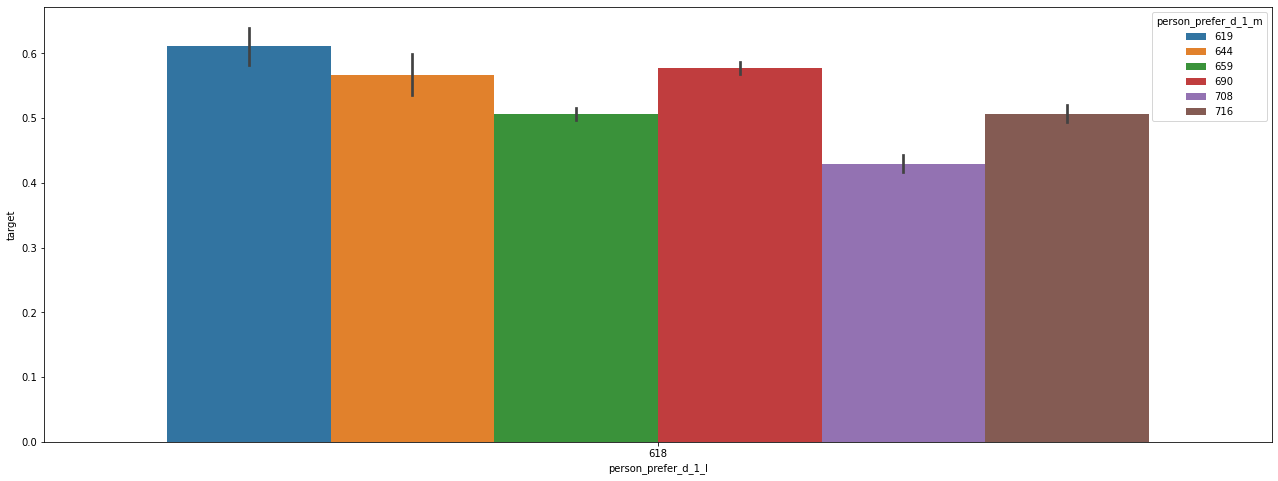

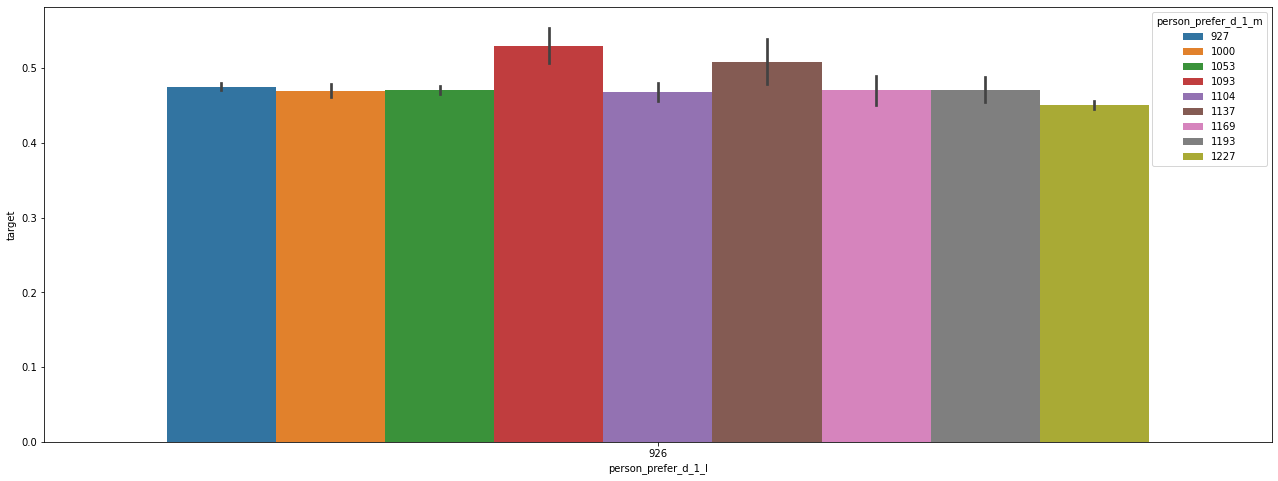

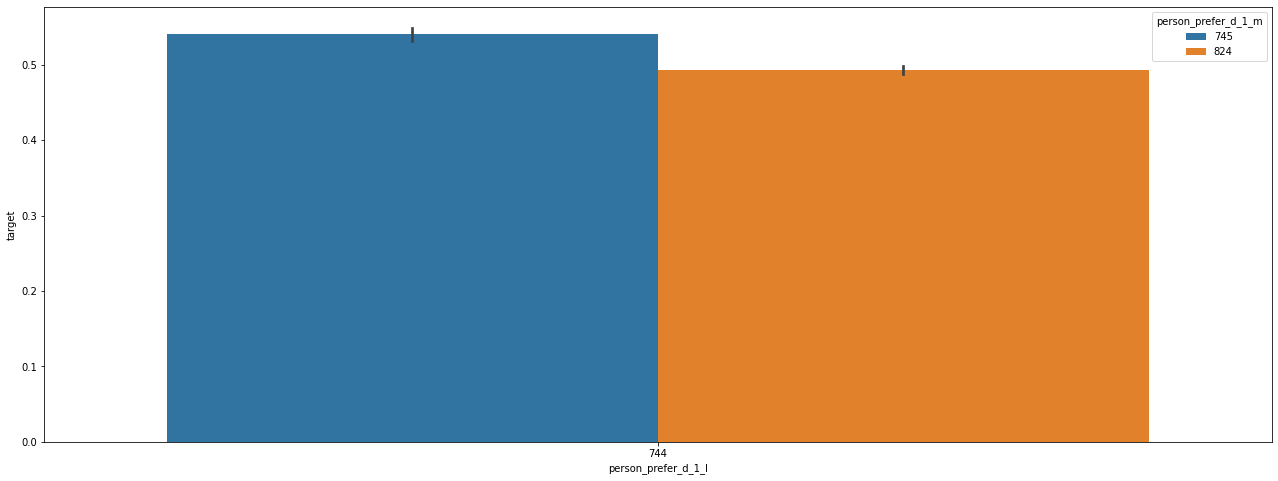

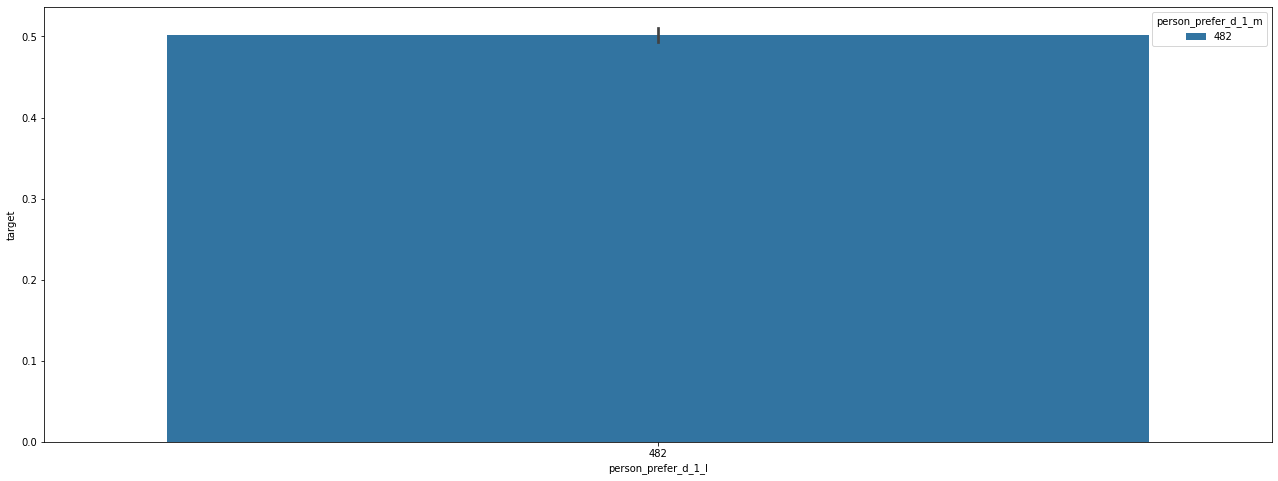

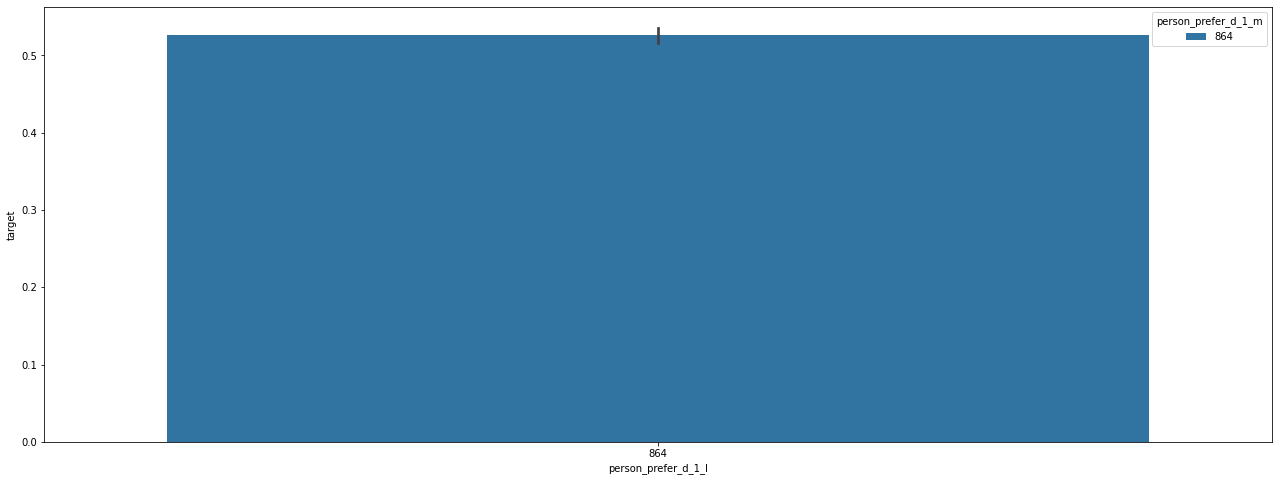

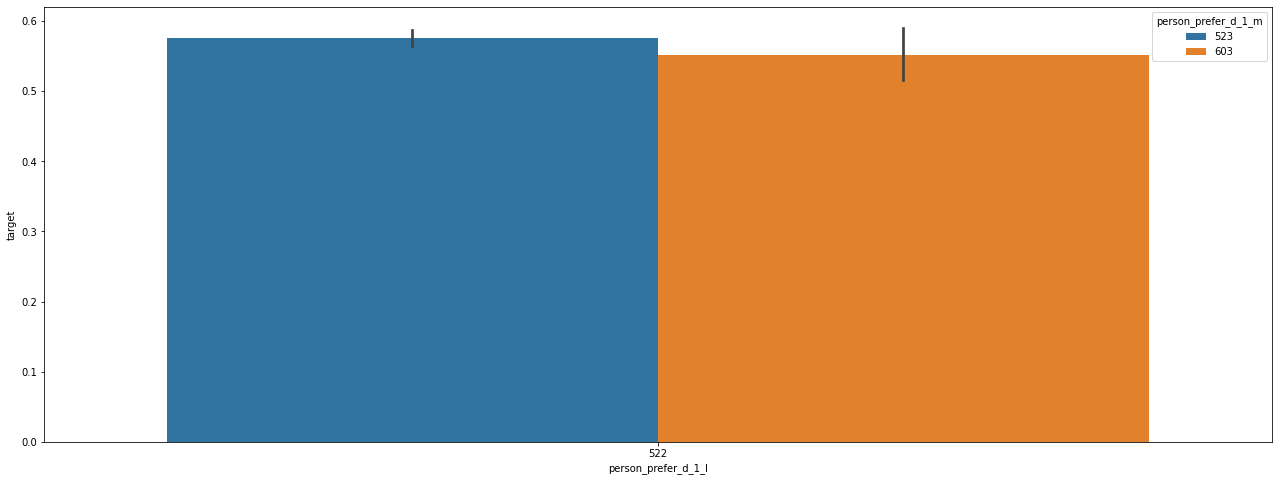

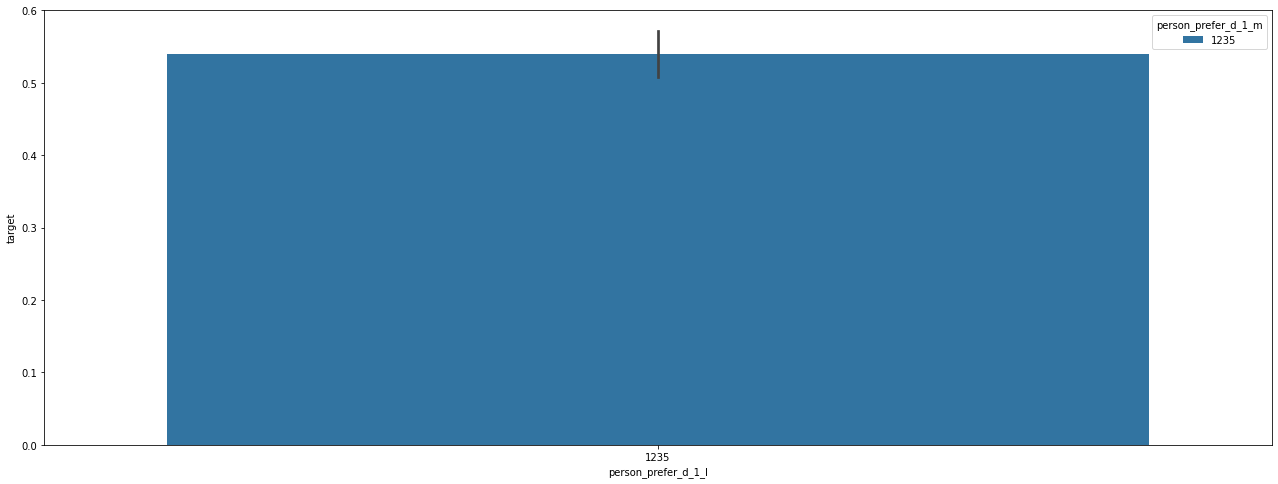

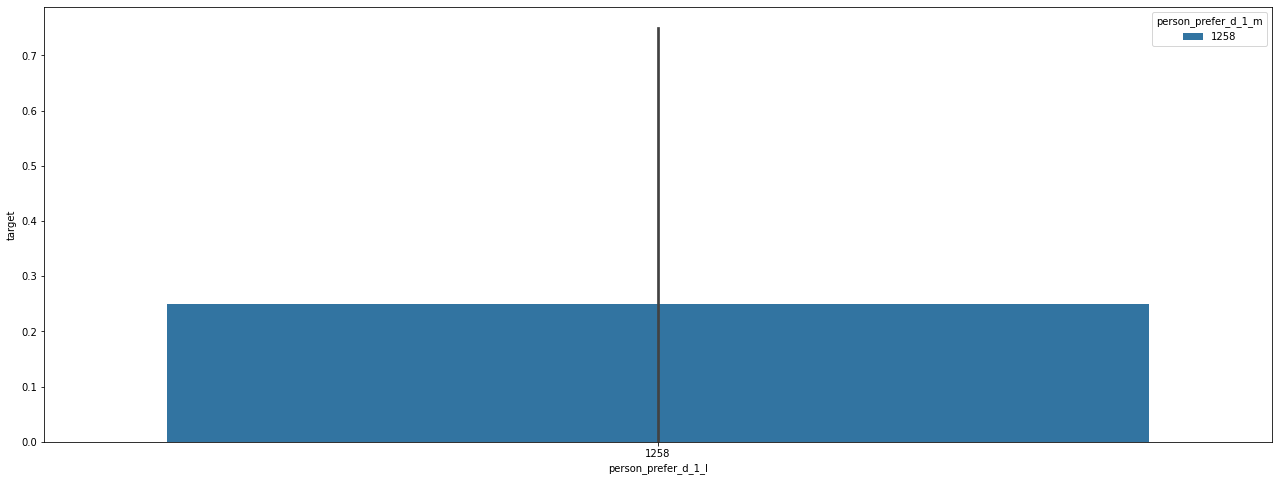

In [52]:
for i in train['person_prefer_d_1_l'].unique():

    plt.figure(figsize = (22,8))

    sns.barplot(data = train[train['person_prefer_d_1_l'] == i], x = 'person_prefer_d_1_l', y = 'target', hue = 'person_prefer_d_1_m')

### H 코드

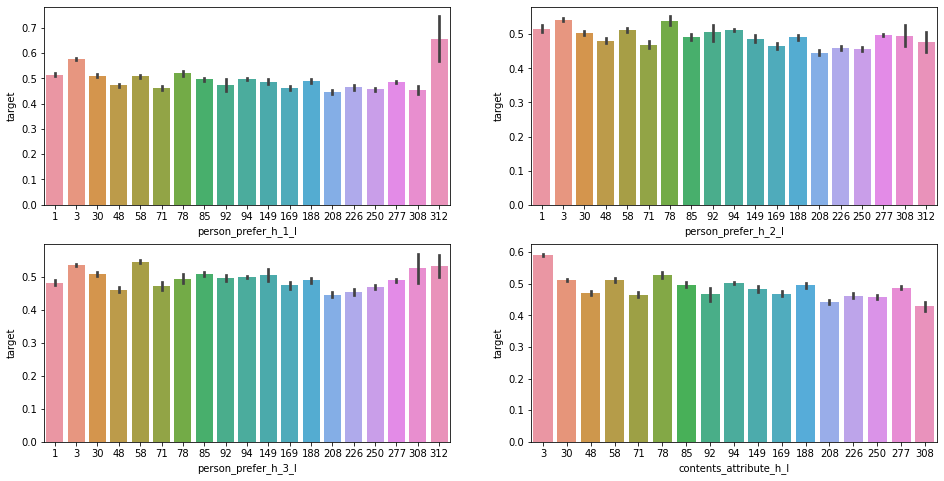

In [53]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,8))

sns.barplot(data = train, x = 'person_prefer_h_1_l', y = 'target', ax = ax[0,0])
sns.barplot(data = train, x = 'person_prefer_h_2_l', y = 'target',ax = ax[0,1])
sns.barplot(data = train, x = 'person_prefer_h_3_l',y = 'target', ax = ax[1,0])
sns.barplot(data = train, x = 'contents_attribute_h_l', y = 'target',ax = ax[1,1])

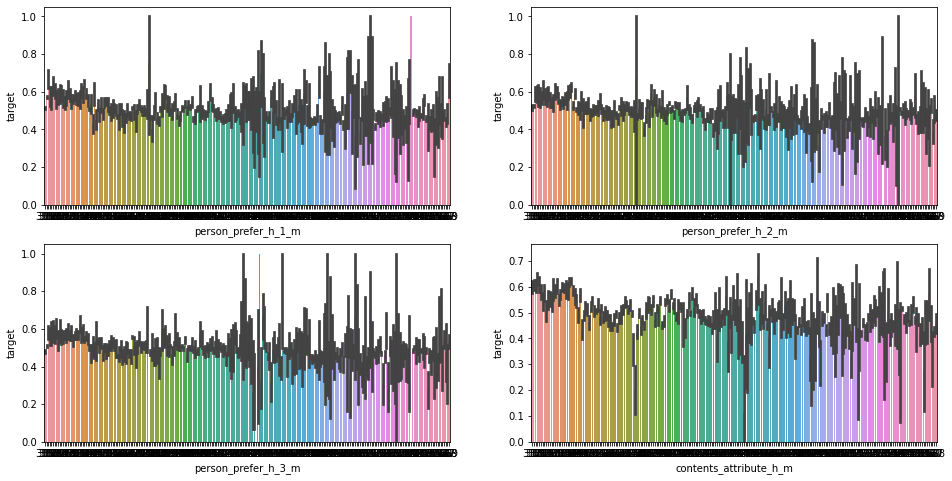

In [54]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,8))

sns.barplot(data = train, x = 'person_prefer_h_1_m', y = 'target', ax = ax[0,0])
sns.barplot(data = train, x = 'person_prefer_h_2_m', y = 'target',ax = ax[0,1])
sns.barplot(data = train, x = 'person_prefer_h_3_m',y = 'target', ax = ax[1,0])
sns.barplot(data = train, x = 'contents_attribute_h_m', y = 'target',ax = ax[1,1])

### L 코드

### contents_open_dt

In [55]:
train['contents_open_dt']

0         2020-01-17 12:09:36
1         2020-06-18 17:48:52
2         2020-07-08 20:00:10
3         2020-01-13 18:09:34
4         2020-03-09 20:39:22
                 ...         
501946    2020-03-13 12:55:52
501947    2020-01-20 11:51:51
501948    2020-08-05 17:27:24
501949    2020-06-15 09:23:21
501950    2020-05-25 14:34:48
Name: contents_open_dt, Length: 501951, dtype: object

In [56]:
# contents_open_dt를 년, 월, 일, 시간으로 나누자.
def date_time(df, columns = 'contents_open_dt'):

    df[columns] = pd.to_datetime(df[columns])
    df['year'] = df[columns].dt.year
    df['month'] = df[columns].dt.month
    df['day'] = df[columns].dt.day
    df['hour'] = df[columns].dt.hour
    df['weekday'] = df[columns].apply(lambda x: x.weekday())
    df['weekend'] = df['weekday'].copy()
    df['weekday'] = df['weekday'].apply(lambda x:1 if x>4 else 0)
    df['date'] = df[columns].dt.date

    return df

train_data = date_time(train)
test_data = date_time(test)

In [57]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,year,month,day,hour,weekday,weekend,date
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,2020,1,17,12,0,4,2020-01-17
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,2020,6,18,17,0,3,2020-06-18
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,2020,7,8,20,0,2,2020-07-08
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,2020,1,13,18,0,0,2020-01-13
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,2020,3,9,20,0,0,2020-03-09


Text(0.5, 1.0, 'Countplot of year by test')

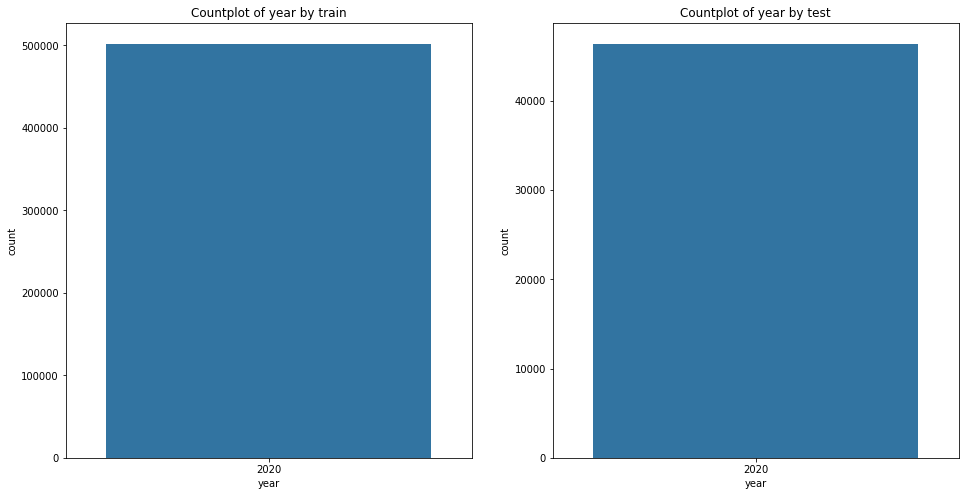

In [58]:
## year 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['year'], ax = ax[0])
sns.countplot(test_data['year'], ax = ax[1])

ax[0].set_title('Countplot of year by train')
ax[1].set_title('Countplot of year by test')

Text(0.5, 1.0, 'Countplot of month by test')

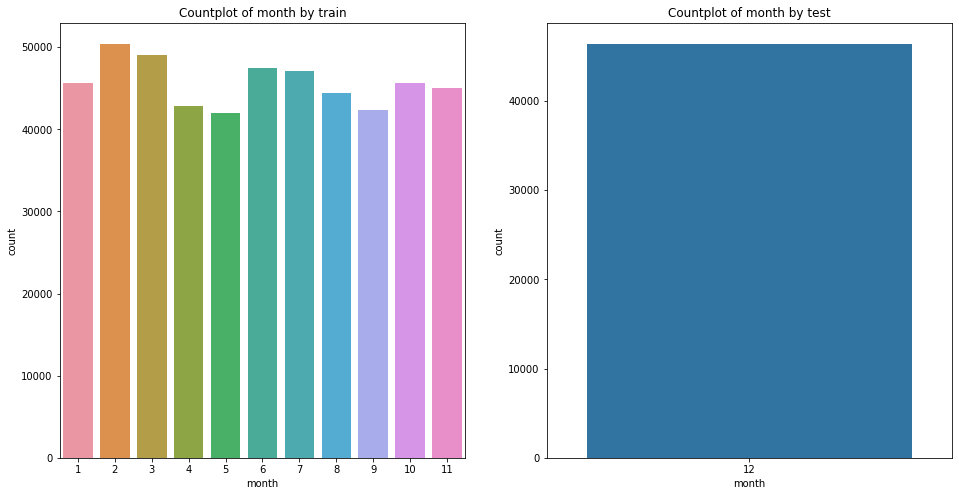

In [59]:
## month 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['month'], ax = ax[0])
sns.countplot(test_data['month'], ax = ax[1])

ax[0].set_title('Countplot of month by train')
ax[1].set_title('Countplot of month by test')

# train 데이터는 1월부터 11월까지지만 test데이터는 12월의 데이터만 가지고 있다.
# 더미화를 사용할 수 없을 것이라 판단된다.

Text(0.5, 1.0, 'Countplot of hour by test')

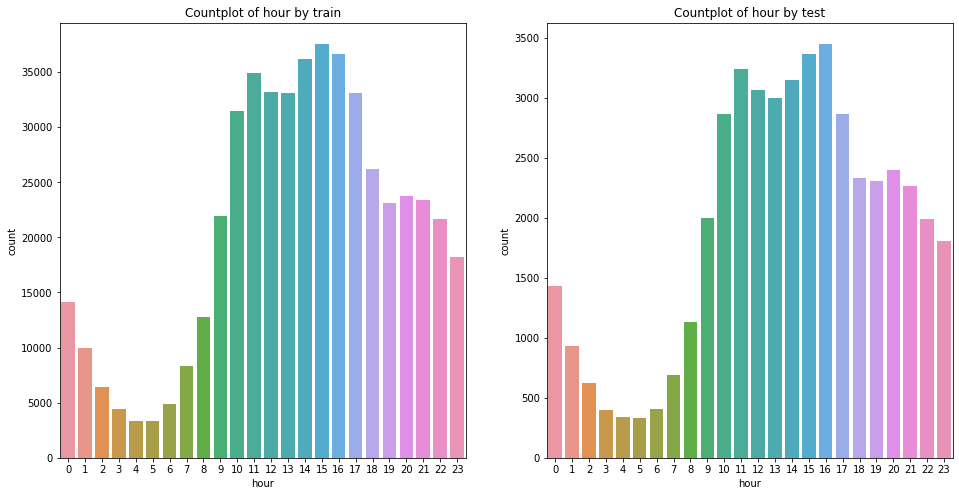

In [60]:
## hour 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['hour'], ax = ax[0])
sns.countplot(test_data['hour'], ax = ax[1])

ax[0].set_title('Countplot of hour by train')
ax[1].set_title('Countplot of hour by test')


## train과 test의 데이터가 비슷한 분포를 가지고 있다는 것을 알 수 있다.

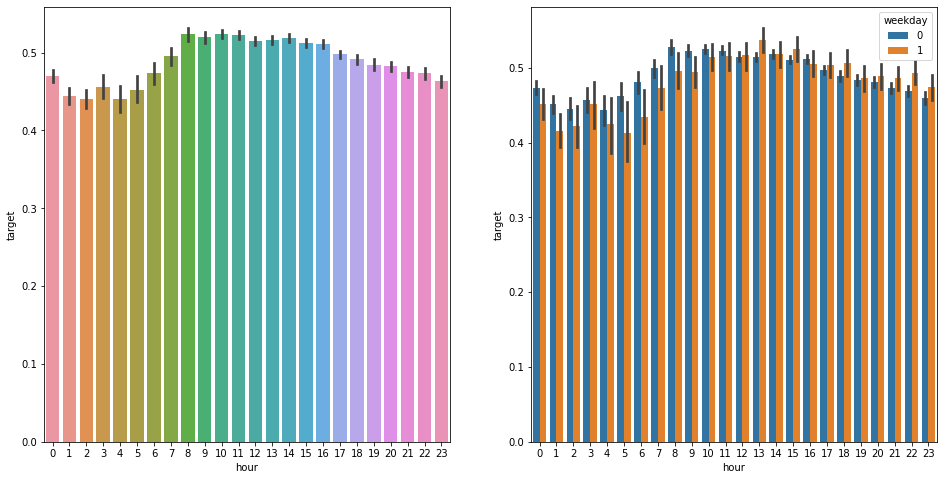

In [61]:
## train의 hour를 target값과 비교해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', ax = ax[0])
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekday', ax = ax[1])

# 재밌는 현상으로 12시 넘어가서는 평일보다 주말에 더 많은 사람이 이용한다.

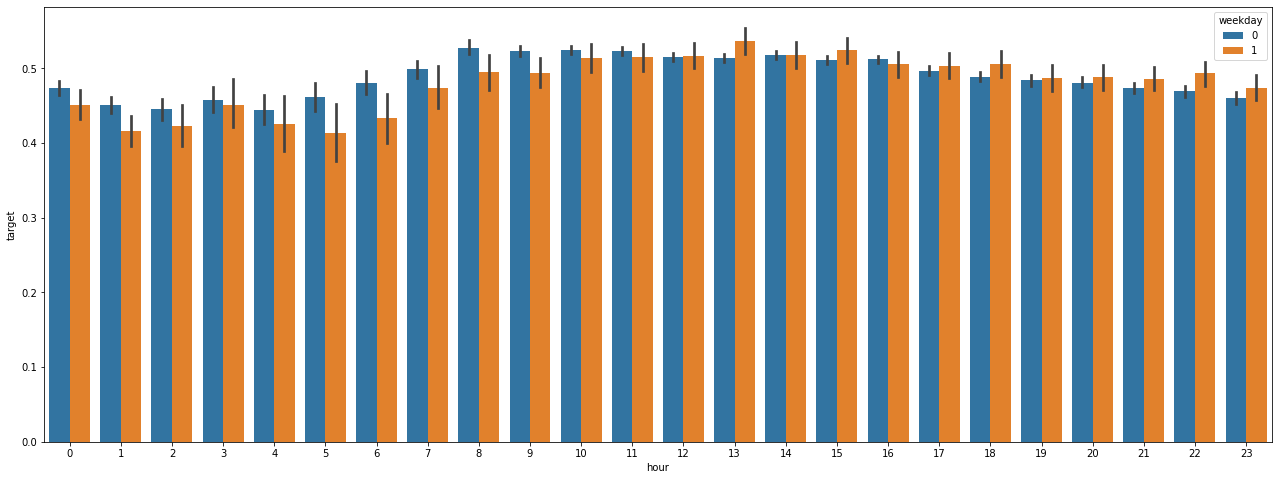

In [62]:
## 더 자세히 살펴보도록 하자.
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekday')

Text(0.5, 1.0, 'weekend of target by train')

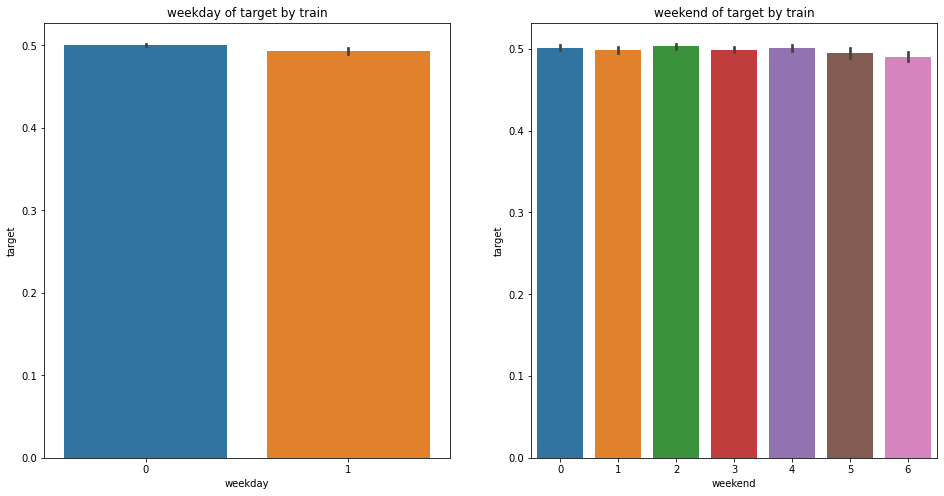

In [63]:
# 평일과 주말을 target과 비교해보자.
fig, ax = plt.subplots(ncols = 2,figsize = (16,8))
sns.barplot(data = train_data, x = 'weekday', y = 'target', ax = ax[0])
sns.barplot(data = train_data, x = 'weekend', y = 'target', ax = ax[1])

ax[0].set_title('weekday of target by train')
ax[1].set_title('weekend of target by train')
# 평일과 주말의 차이가 크지 않다고 생각한다.

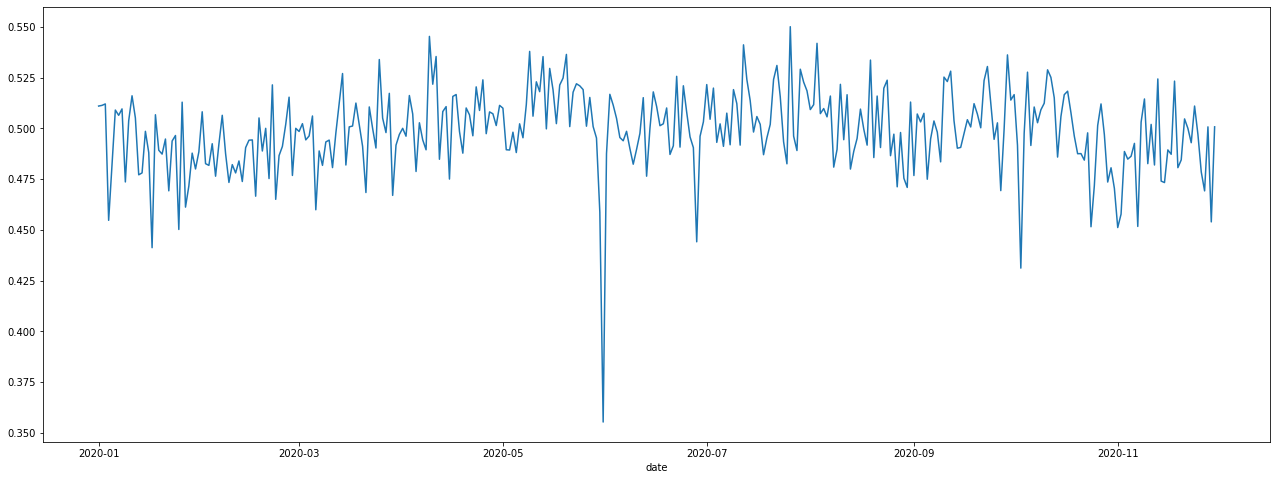

In [64]:
## date를 이용하여 점점 늘어나는지 확인해보자.
plot_data = train_data.groupby('date')['target'].mean()
plot_data
plt.figure(figsize = (22,8))
sns.lineplot(data = plot_data, x = plot_data.index, y = plot_data.values)

In [65]:
## 우리가 확인해봐야할 것
## 평일에 공휴일인 곳을 바꿔줘야 한다.
## 왜 저 날은 내려갔을까?
## 중복 제거를 해야할 것 같은데 그 부분도 한번 계속 확인해보자.

In [66]:
train_data['date'][0]

datetime.date(2020, 1, 17)

In [67]:
for i in plot_data.index:
    if plot_data[i] < 0.4:
        print(i)

## 왜 이 날짜만 적게 나타났을까?
train_data[train_data['date'] == datetime.date(2020, 5, 31)]

2020-05-31


,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,year,month,day,hour,weekday,weekend,date
2684,2684,False,False,False,True,False,False,1,4,2,1,1080,1057,1079,4,1,1,31,2,86,3,3,5,1,1,2,953,282,5,6,36,203906,79677,2020-05-31 20:32:09,0,1078,1078,1053,926,1056,1054,1053,926,1078,1078,1053,926,276,274,274,216,30,342,1,315,85,391,30,347,952,951,930,2009,2020,5,31,20,1,6,2020-05-31
3814,3814,True,False,False,True,True,False,1,3,3,5,114,181,175,3,1,1,253,254,260,3,2,5,1,1,2,642,145,1,3,254,419870,252469,2020-05-31 18:40:53,0,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,250,519,250,519,250,525,250,519,635,634,623,2006,2020,5,31,18,1,6,2020-05-31
4473,4473,True,False,False,True,False,False,2,0,2,5,1092,1086,1085,4,1,1,66,68,138,3,3,10,2,1,2,825,1234,1,3,68,506906,318695,2020-05-31 11:26:06,0,1086,1086,1053,926,1086,1086,1053,926,1085,1083,1053,926,1227,1227,1227,926,58,374,58,376,94,421,58,376,823,816,815,2006,2020,5,31,11,1,6,2020-05-31
5812,5812,False,False,False,True,True,False,1,6,3,1,715,665,713,2,1,1,253,254,260,3,3,5,1,1,2,1851,452,4,3,254,419903,252432,2020-05-31 11:41:46,0,715,708,708,618,662,660,659,618,709,708,708,618,452,451,450,377,250,519,250,519,250,525,250,519,1846,1843,1832,2020,2020,5,31,11,1,6,2020-05-31
6130,6130,False,False,False,True,True,False,1,7,2,3,27,984,163,5,1,1,96,131,139,3,3,5,1,1,2,1654,729,5,4,98,550064,51707,2020-05-31 07:22:01,1,24,16,2,1,982,982,927,926,159,152,56,1,727,717,716,618,94,399,94,417,94,422,94,399,1653,1649,1645,2017,2020,5,31,7,1,6,2020-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499414,499414,True,True,False,True,True,True,2,0,2,1,1227,782,1027,0,1,1,310,4,119,1,2,5,1,1,2,106,1233,1,4,310,929084,655184,2020-05-31 20:09:33,1,1227,1227,1227,926,782,782,745,744,1027,1026,1000,926,1227,1227,1227,926,308,567,3,316,94,408,308,567,104,100,99,2006,2020,5,31,20,1,6,2020-05-31
500890,500890,True,False,False,True,False,False,2,0,4,1,110,113,182,3,1,1,31,278,86,1,3,5,1,1,2,1107,114,1,4,46,135364,111381,2020-05-31 16:39:39,1,110,109,56,1,110,109,56,1,182,152,56,1,114,109,56,1,30,342,277,542,85,391,30,357,1103,1097,1021,2010,2020,5,31,16,1,6,2020-05-31
501045,501045,True,True,True,False,False,False,1,5,2,1,857,851,1227,4,1,1,2,4,95,3,3,5,1,1,2,861,857,5,4,192,442139,717924,2020-05-31 10:05:52,1,854,853,824,744,847,847,824,744,1227,1227,1227,926,854,853,824,744,1,315,3,316,94,398,188,464,857,848,826,2006,2020,5,31,10,1,6,2020-05-31
501457,501457,True,True,False,True,True,True,1,1,4,5,515,499,519,3,1,1,285,287,279,2,3,3,1,1,2,1835,514,4,4,285,327536,188831,2020-05-31 20:47:25,1,514,509,482,482,499,495,482,482,518,509,482,482,514,509,482,482,27

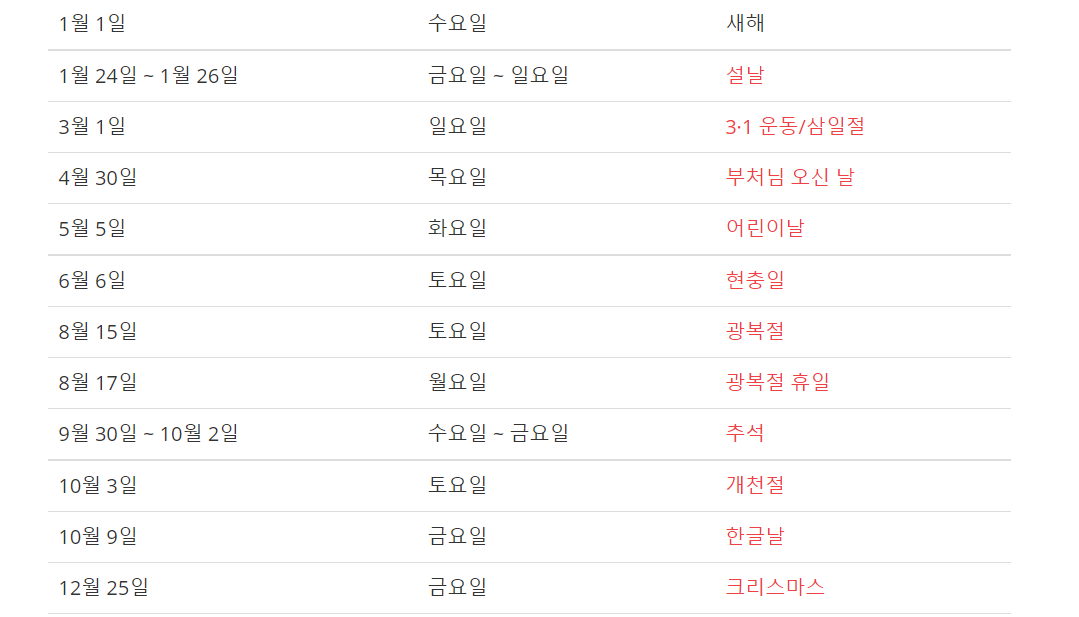

In [68]:
## 평일인데 공휴일인 부분은 주말로 변경해주자.
train_data['date'] = train_data['date'].apply(lambda x:str(x))

change_date = ['2020-01-01', '2020-01-24', '2020-04-30','2020-05-05','2020-08-17', '2020-09-30','2020-10-01','2020-10-02','2020-10-09','2020-12-25']

for i in train_data.index:
    if train_data.loc[i, 'date'] in change_date:

        train_data.loc[i, 'weekday'] = 1

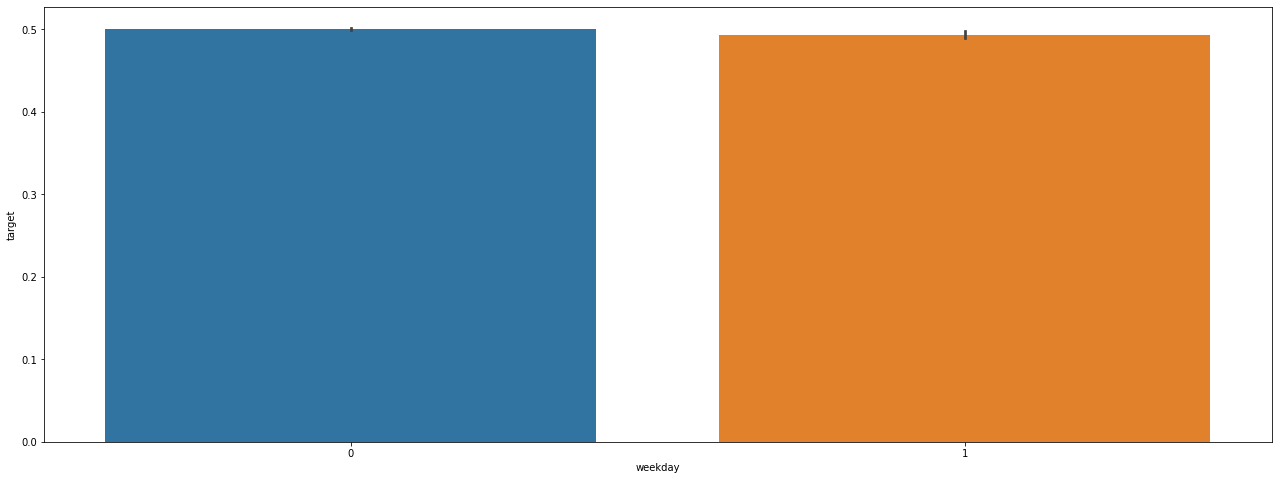

In [69]:
# ??? 영향이 없나...? ㅎㅎ
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'weekday', y = 'target')

## Modeling

In [70]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_

In [71]:
## 변수를 추출하며 확인해 보자.

dummy_column = ['hour','weekday','contents_attribute_l_l', 'contents_attribute_h_l','contents_attribute_d_l', 'person_attribute_a', 'person_attribute_b','person_prefer_c','person_prefer_e','contents_attribute_j_1','contents_attribute_c','contents_attribute_m','contents_attribute_e']
add_column = ['contents_attribute_i','contents_attribute_k']

final_train = train_data[dummy_column + add_column + ['target']]
final_test = test_data[dummy_column + add_column]

# train에만 존재하는 변수가 있기 때문에
final_train = pd.get_dummies(data = final_train, columns = dummy_column).drop(['contents_attribute_l_l_2024','contents_attribute_d_l_1258'], axis = 1)
final_test = pd.get_dummies(data = final_test, columns = dummy_column)

In [72]:
print('train_data shape :', final_train.shape)
print('test_data shape :', final_test.shape)

train_data shape : (501951, 131)
test_data shape : (46404, 130)


In [73]:
!pip install catboost
!pip install vecstack

     |████████████████████████████████| 76.3 MB 1.2 MB/s 
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=f31a038dfb2c6ef30062d299043632821201618eea40c74c1257cca32cf4d868
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [79]:
## Stacking을 사용해보자

from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from vecstack import stacking
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression
from sklearn.metrics import f1_score

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

def f1_score_predict(y, y_pred):
    return f1_score(y, y_pred, pos_label = 1)

## regression으로 문제를 푼다면
lgb = LGBMRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
cat = CatBoostRegressor(random_state = 42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
models = [lgb, xgb, cat, rfg, ridge]

# ## classifier로 문제를 푼다면
# lgb = LGBMClassifier(random_state= 42)
# xgb = XGBClassifier(random_state= 42, tree_method = 'gpu_hist')
# cat = CatBoostClassifier(random_state = 42,task_type = 'GPU')
# rfg = RandomForestClassifier(random_state = 42)
# ridge = RidgeClassifier(random_state = 42)
# models = [lgb, xgb, cat, rfg, ridge]

S_train, S_test = stacking(models, final_train.drop('target', axis = 1), final_train['target'], final_test, regression = True, mode = 'oof_pred_bag', metric = rmse, n_folds = 3, shuffle = True)

lr.fit(S_train, final_train['target'])
prediction = lr.predict(S_test)

prediction = np.where(prediction >= 0.4, 1, 0)

# print(prediction)

[15:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.086503
0:	learn: 0.4989758	total: 6.52ms	remaining: 6.51s
1:	learn: 0.4981216	total: 11.9ms	remaining: 5.92s
2:	learn: 0.4974099	total: 16.9ms	remaining: 5.63s
3:	learn: 0.4967963	total: 22ms	remaining: 5.49s
4:	learn: 0.4962818	total: 31.5ms	remaining: 6.27s
5:	learn: 0.4958596	total: 38.4ms	remaining: 6.37s
6:	learn: 0.4955017	total: 44.9ms	remaining: 6.37s
7:	learn: 0.4952113	total: 49.8ms	remaining: 6.18s
8:	learn: 0.4949256	total: 54.9ms	remaining: 6.04s
9:	learn: 0.4947032	total: 59.9ms	remaining: 5.93s
10:	learn: 0.4944061	total: 64.9ms	remaining: 5.84s
11:	learn: 0.4942057	total: 69.9ms	remaining: 5.75s
12:	learn: 0.4940293	total: 89.8ms	remaining: 6.82s
13:	learn: 0.4937983	total: 101ms	remaining: 7.08s
14:	learn: 0.4936616	total: 106ms	remaining: 6.93s
15:	learn: 0.4935213	total: 111ms	remaining: 6.81s
16:	learn: 0.4934071	total: 116ms	remaining: 6.7s
17:	learn: 0.4933149	total: 121ms	remaining: 6.6s
18:	learn: 0.4932081	total: 126ms	remaining: 6.5s
19:

In [80]:
# model = CatBoostClassifier(random_state = 42)
# model.fit(final_train.drop('target', axis = 1), final_train['target'], )
# prediction = model.predict(final_test)

In [81]:
a = []
b = []
for i in prediction:

    if i == 0:
        a.append(i)
    else:
        b.append(i)

In [83]:
print(len(a), len(b))

7745 38659


In [82]:
submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

submission['target'] = prediction

submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)